In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import brute
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/unemployment.csv',skiprows=8,names = ['Year','Rate'],header = None)

In [3]:
df.head()

,Year,Rate
0,1971,4.1
1,1972,4.3
2,1973,3.7
3,1974,3.7
4,1975,4.5


In [4]:
df.tail()

,Year,Rate
843,2020 JUL,4.5
844,2020 AUG,4.8
845,2020 SEP,4.9
846,2020 OCT,5.0
847,2020 NOV,5.1


In [5]:
df.dtypes

Year     object
Rate    float64
dtype: object

Wish to convert the year column to a year format instead of being an object

In [6]:
df['Year'] = df['Year'].str.replace(r'(?<=\d{4})\s\w+',"",regex=True)
df['Year'] = pd.to_datetime(df['Year'])

In [7]:
df = df.groupby('Year')['Rate'].mean()

In [8]:
df.head()

Year
1971-01-01    4.156250
1972-01-01    4.341176
1973-01-01    3.658824
1974-01-01    3.652941
1975-01-01    4.505882
Name: Rate, dtype: float64

In [9]:
df.dtypes

dtype('float64')

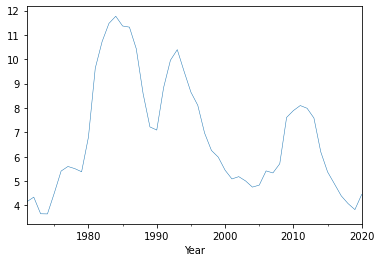

In [10]:
df.plot(linewidth=0.5);

Threshold of 10 percent that the time series is stationary

In [11]:
train = df[0:45]
test = df[45:49]

In [12]:
test

Year
2016-01-01    4.888235
2017-01-01    4.394118
2018-01-01    4.076471
2019-01-01    3.829412
Name: Rate, dtype: float64

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(train)

(-2.710774166681941,
 0.07219235214806866,
 1,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 67.95996568435356)

Reject null hypothesis and conclude time series is stationary

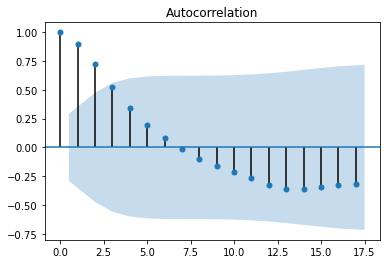

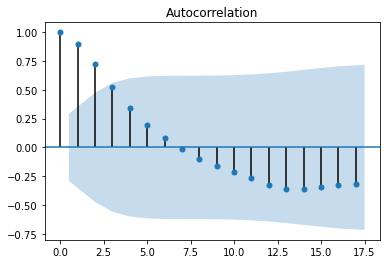

In [14]:
plot_acf(train)

In [15]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=104.814, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=207.089, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.468, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=157.091, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=310.983, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=104.101, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=130.910, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.378, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=104.795, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=116.082, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=102.917, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=103.085, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=104.764, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=103.415, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=106.6

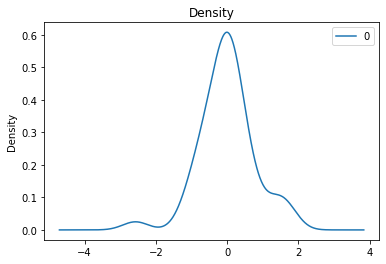

In [16]:
residuals = pd.DataFrame(model.resid())
residuals.plot(kind='kde', title='Density')
                         

In [17]:
forecast = model.predict(n_periods = 4)
forecast

array([5.24478774, 5.38681231, 5.62849583, 5.88095852])

In [18]:
forecasts,ci = model.predict(n_periods=4,return_conf_int=True)

In [19]:
forecasts

array([5.24478774, 5.38681231, 5.62849583, 5.88095852])

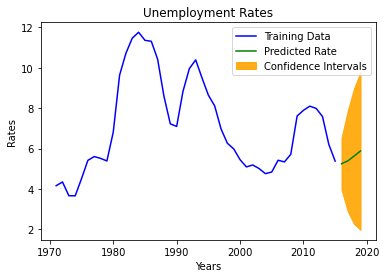

In [20]:
plt.plot(train, color='blue', label='Training Data')
plt.plot(test.index, forecasts, color='green',
     label='Predicted Rate')

plt.title('Unemployment Rates')
plt.xlabel('Years')
plt.ylabel('Rates')

conf_int = np.asarray(ci)
plt.fill_between(test.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")


plt.legend()